<a href="https://colab.research.google.com/github/DarTS2701/Modelos-de-Regresi-n-Lineal/blob/main/act_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()


Saving cuentas_credicel.csv to cuentas_credicel.csv


{'cuentas_credicel.csv': b'folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,agente_venta,dis_venta,status,fraude,empresa,inversion,pagos_realizados,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,,,,\r\n3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949,780,0,81,1169,2106,0,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,0,,,,,,,0,0,0,0,0,,,26,\r\n4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999,1050,0,225,1949,2925,0,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,0,,,,,,,0,0,0,0,0,,,13,\r\n5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959,490,0,170,1469,2210,0,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,0,,,,,Cancelado,0,0,0,0,0,,,74,,\r\n6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959,490,0,170,1469,2210,0,Luz

In [8]:
pd.options.display.max_columns = None


In [9]:
data = pd.read_csv('cuentas_credicel.csv', encoding='latin')
data

<ipython-input-9-590c15e2f564>:1: DtypeWarning: Columns (26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cuentas_credicel.csv', encoding='latin')


folio       tag  folio_solicitud             fecha     marca  \
0          3  HDNAWQ3A               30  12/11/2021 19:00       ZTE   
1          4  M418YNR4               33  12/11/2021 19:15  MOTOROLA   
2          5  SZ7V3NZT               37  13/11/2021 14:13       ZTE   
3          6  9I08UIQZ               38  13/11/2021 15:45       ZTE   
4          7  JMF4LKYU               44  13/11/2021 16:10  MOTOROLA   
...      ...       ...              ...               ...       ...   
22730  22967  92KQVRIX            96502  18/04/2023 18:45  Motorola   
22731  22968  NWB2EA8J            96479  18/04/2023 18:46  Motorola   
22732  22969  VDTRJ2W6            96442  18/04/2023 18:47   Samsung   
22733  22970  PETLF56C            96536  18/04/2023 18:49   Samsung   
22734  22971  2CI4N2WS            96534  18/04/2023 18:49   Samsung   

                             modelo plazo  precio  enganche  descuento  \
0                Blade A3 2020 RO B   26S  1949.0     780.0        0.0   
1      LTE XT2097-12 E7I POWER Azul   13S  2999.0    1050.0        0.0   
2                BLADE A3 2020 Gris   13S  1959.0     490.0        0.0   
3                BLADE A3 2020 Gris   13S  1959.0     490.0        0.0   
4                             G10 B   39S  4299.0    1075.0        0.0   
...                             ...   ...     ...       ...        ...   
22730                      Moto E13   26S  3349.0     297.0        0.0   
22731                     Moto E22i   26S  4100.0    1209.0        0.0   
22732                           A13   26S  4849.0    1152.0        0.0   
22733                        A53 5G   39S  9799.0    2799.0        0.0   
22734                        A22 5G   26S  5399.0    1086.0        0.0   

       semana  monto_financiado  costo_total  monto_accesorios  \
0          81            1169.0         2106               0.0   
1         225            1949.0         2925               0.0   
2         170            1469.0         2210               0.0   
3         170            1469.0         2210               0.0   
4         178            3224.0         6942               0.0   
...       ...               ...          ...               ...   
22730     211            3052.0         5486               0.0   
22731     200            2891.0         5200               0.0   
22732     256            3697.0         6656               0.0   
22733     386            7000.0        15054               0.0   
22734     299            4313.0         7774               0.0   

                           agente_venta dis_venta  status  fraude  \
0       Sintia Verenice Tenorio Perez E   mic0437       2       0   
1                 Alvaro Rafael Pascual    mic015       2       0   
2       Sintia Verenice Tenorio Perez E   mic0437       3       0   
3            Luz Aylin Hernandez Lopez1   mic0748       2       0   
4       Sintia Verenice Tenorio Perez E   mic0437       1       0   
...                                 ...       ...     ...     ...   
22730  Mildred Asuncion Arguello Caamal    svc044       1       0   
22731      Maria Guadalupe Vargas Lopez    PXC004       1       0   
22732           Nicolás Jiménez Sánchez    gph008       1       0   
22733           Maribel Ulibarri Medina    gph014       1       0   
22734              Netza Fierros Mateos    php005       1       0   

           empresa  inversion  pagos_realizados  reautorizacion  \
0         microtec          0                 0               0   
1         microtec          0                 0               0   
2         microtec          0                 0               0   
3         microtec          0                 0               0   
4         microtec          0                 0               0   
...            ...        ...               ...             ...   
22730     servicel          0                 0               0   
22731  pixelulares          0                 0               0   
22732          NaN          0           

In [10]:
#Reemplazo de datos tipo string a datos tipo numérico
data.plazo = data.plazo.replace({'S':''}, regex=True)
data.plazo

0        26
1        13
2        13
3        13
4        39
         ..
22730    26
22731    26
22732    26
22733    39
22734    26
Name: plazo, Length: 22735, dtype: object

In [11]:
data

folio       tag  folio_solicitud             fecha     marca  \
0          3  HDNAWQ3A               30  12/11/2021 19:00       ZTE   
1          4  M418YNR4               33  12/11/2021 19:15  MOTOROLA   
2          5  SZ7V3NZT               37  13/11/2021 14:13       ZTE   
3          6  9I08UIQZ               38  13/11/2021 15:45       ZTE   
4          7  JMF4LKYU               44  13/11/2021 16:10  MOTOROLA   
...      ...       ...              ...               ...       ...   
22730  22967  92KQVRIX            96502  18/04/2023 18:45  Motorola   
22731  22968  NWB2EA8J            96479  18/04/2023 18:46  Motorola   
22732  22969  VDTRJ2W6            96442  18/04/2023 18:47   Samsung   
22733  22970  PETLF56C            96536  18/04/2023 18:49   Samsung   
22734  22971  2CI4N2WS            96534  18/04/2023 18:49   Samsung   

                             modelo plazo  precio  enganche  descuento  \
0                Blade A3 2020 RO B    26  1949.0     780.0        0.0   
1      LTE XT2097-12 E7I POWER Azul    13  2999.0    1050.0        0.0   
2                BLADE A3 2020 Gris    13  1959.0     490.0        0.0   
3                BLADE A3 2020 Gris    13  1959.0     490.0        0.0   
4                             G10 B    39  4299.0    1075.0        0.0   
...                             ...   ...     ...       ...        ...   
22730                      Moto E13    26  3349.0     297.0        0.0   
22731                     Moto E22i    26  4100.0    1209.0        0.0   
22732                           A13    26  4849.0    1152.0        0.0   
22733                        A53 5G    39  9799.0    2799.0        0.0   
22734                        A22 5G    26  5399.0    1086.0        0.0   

       semana  monto_financiado  costo_total  monto_accesorios  \
0          81            1169.0         2106               0.0   
1         225            1949.0         2925               0.0   
2         170            1469.0         2210               0.0   
3         170            1469.0         2210               0.0   
4         178            3224.0         6942               0.0   
...       ...               ...          ...               ...   
22730     211            3052.0         5486               0.0   
22731     200            2891.0         5200               0.0   
22732     256            3697.0         6656               0.0   
22733     386            7000.0        15054               0.0   
22734     299            4313.0         7774               0.0   

                           agente_venta dis_venta  status  fraude  \
0       Sintia Verenice Tenorio Perez E   mic0437       2       0   
1                 Alvaro Rafael Pascual    mic015       2       0   
2       Sintia Verenice Tenorio Perez E   mic0437       3       0   
3            Luz Aylin Hernandez Lopez1   mic0748       2       0   
4       Sintia Verenice Tenorio Perez E   mic0437       1       0   
...                                 ...       ...     ...     ...   
22730  Mildred Asuncion Arguello Caamal    svc044       1       0   
22731      Maria Guadalupe Vargas Lopez    PXC004       1       0   
22732           Nicolás Jiménez Sánchez    gph008       1       0   
22733           Maribel Ulibarri Medina    gph014       1       0   
22734              Netza Fierros Mateos    php005       1       0   

           empresa  inversion  pagos_realizados  reautorizacion  \
0         microtec          0                 0               0   
1         microtec          0                 0               0   
2         microtec          0                 0               0   
3         microtec          0                 0               0   
4         microtec          0                 0               0   
...            ...        ...               ...             ...   
22730     servicel          0                 0               0   
22731  pixelulares          0                 0               0   
22732          NaN          0           

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [13]:
data['plazo']= data['plazo'].astype(int)

In [14]:
riesgo_categorias = data.groupby(['riesgo'])['riesgo'].count()
riesgo_categorias

riesgo
-35.0          1
-34.7          2
-34.4          1
-33.7          1
-33.35         1
            ... 
9.95           5
91             1
Atraso         1
Cancelado     89
Fraude       793
Name: riesgo, Length: 2743, dtype: int64

In [15]:
data["riesgo"]= data["riesgo"].fillna(0)

In [16]:
data['riesgo']=data['riesgo'].str.replace('Atraso', '0')
data['riesgo']=data['riesgo'].str.replace('Cancelado', '0')
data['riesgo']=data['riesgo'].str.replace('Fraude', '0')

In [17]:
#Conversión de tipo de dato de columna de tipo Object a int
data['riesgo']= data['riesgo'].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  int64  
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [19]:
df_filtrado=data.iloc[ : , [0,2,6,7,8,9,10,11,12,13,16,17,19,20,21,25,26,27,28,29]]
df_filtrado

folio  folio_solicitud  plazo  precio  enganche  descuento  semana  \
0          3               30     26  1949.0     780.0        0.0      81   
1          4               33     13  2999.0    1050.0        0.0     225   
2          5               37     13  1959.0     490.0        0.0     170   
3          6               38     13  1959.0     490.0        0.0     170   
4          7               44     39  4299.0    1075.0        0.0     178   
...      ...              ...    ...     ...       ...        ...     ...   
22730  22967            96502     26  3349.0     297.0        0.0     211   
22731  22968            96479     26  4100.0    1209.0        0.0     200   
22732  22969            96442     26  4849.0    1152.0        0.0     256   
22733  22970            96536     39  9799.0    2799.0        0.0     386   
22734  22971            96534     26  5399.0    1086.0        0.0     299   

       monto_financiado  costo_total  monto_accesorios  status  fraude  \
0                1169.0         2106               0.0       2       0   
1                1949.0         2925               0.0       2       0   
2                1469.0         2210               0.0       3       0   
3                1469.0         2210               0.0       2       0   
4                3224.0         6942               0.0       1       0   
...                 ...          ...               ...     ...     ...   
22730            3052.0         5486               0.0       1       0   
22731            2891.0         5200               0.0       1       0   
22732            3697.0         6656               0.0       1       0   
22733            7000.0        15054               0.0       1       0   
22734            4313.0         7774               0.0       1       0   

       inversion  pagos_realizados  reautorizacion  puntos  riesgo  \
0              0                 0               0     NaN     NaN   
1              0                 0               0     NaN     NaN   
2              0                 0               0     NaN     0.0   
3              0                 0               0     NaN     NaN   
4              0                 0               0     0.0     0.0   
...          ...               ...             ...     ...     ...   
22730          0                 0               0     NaN     NaN   
22731          0                 0               0     NaN     NaN   
22732          0                 0               0     NaN     NaN   
22733          0                 0               0     NaN     NaN   
22734          1                 0               0     NaN     NaN   

       porc_enganche  porc_tasa  score_buro  
0                NaN       0.00         0.0  
1                NaN       0.00         0.0  
2               0.00       0.00         0.0  
3                NaN       0.00         0.0  
4               0.00       0.00         0.0  
...              ...        ...         ...  
22730          27.40      -1.13         0.0  
22731          19.00       7.48         0.0  
22732          26.65       0.75         0.0  
22733         -17.35      -0.14         0.0  
22734          21.80      -2.88         0.0  

[22735 rows x 20 columns]

In [20]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  float64
 4   enganche          22735 non-null  float64
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  int64  
 7   monto_financiado  22735 non-null  float64
 8   costo_total       22735 non-null  int64  
 9   monto_accesorios  22735 non-null  float64
 10  status            22735 non-null  int64  
 11  fraude            22735 non-null  int64  
 12  inversion         22735 non-null  int64  
 13  pagos_realizados  22735 non-null  int64  
 14  reautorizacion    22735 non-null  int64  
 15  puntos            19140 non-null  float64
 16  riesgo            13911 non-null  float6

In [21]:
#Identificar valores nulos por columna
valores_nulos=df_filtrado.isnull().sum()
valores_nulos


folio                  0
folio_solicitud        0
plazo                  0
precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
status                 0
fraude                 0
inversion              0
pagos_realizados       0
reautorizacion         0
puntos              3595
riesgo              8824
porc_enganche       2473
porc_tasa              0
score_buro             0
dtype: int64

In [22]:
df=df_filtrado.copy()
df

folio  folio_solicitud  plazo  precio  enganche  descuento  semana  \
0          3               30     26  1949.0     780.0        0.0      81   
1          4               33     13  2999.0    1050.0        0.0     225   
2          5               37     13  1959.0     490.0        0.0     170   
3          6               38     13  1959.0     490.0        0.0     170   
4          7               44     39  4299.0    1075.0        0.0     178   
...      ...              ...    ...     ...       ...        ...     ...   
22730  22967            96502     26  3349.0     297.0        0.0     211   
22731  22968            96479     26  4100.0    1209.0        0.0     200   
22732  22969            96442     26  4849.0    1152.0        0.0     256   
22733  22970            96536     39  9799.0    2799.0        0.0     386   
22734  22971            96534     26  5399.0    1086.0        0.0     299   

       monto_financiado  costo_total  monto_accesorios  status  fraude  \
0                1169.0         2106               0.0       2       0   
1                1949.0         2925               0.0       2       0   
2                1469.0         2210               0.0       3       0   
3                1469.0         2210               0.0       2       0   
4                3224.0         6942               0.0       1       0   
...                 ...          ...               ...     ...     ...   
22730            3052.0         5486               0.0       1       0   
22731            2891.0         5200               0.0       1       0   
22732            3697.0         6656               0.0       1       0   
22733            7000.0        15054               0.0       1       0   
22734            4313.0         7774               0.0       1       0   

       inversion  pagos_realizados  reautorizacion  puntos  riesgo  \
0              0                 0               0     NaN     NaN   
1              0                 0               0     NaN     NaN   
2              0                 0               0     NaN     0.0   
3              0                 0               0     NaN     NaN   
4              0                 0               0     0.0     0.0   
...          ...               ...             ...     ...     ...   
22730          0                 0               0     NaN     NaN   
22731          0                 0               0     NaN     NaN   
22732          0                 0               0     NaN     NaN   
22733          0                 0               0     NaN     NaN   
22734          1                 0               0     NaN     NaN   

       porc_enganche  porc_tasa  score_buro  
0                NaN       0.00         0.0  
1                NaN       0.00         0.0  
2               0.00       0.00         0.0  
3                NaN       0.00         0.0  
4               0.00       0.00         0.0  
...              ...        ...         ...  
22730          27.40      -1.13         0.0  
22731          19.00       7.48         0.0  
22732          26.65       0.75         0.0  
22733         -17.35      -0.14         0.0  
22734          21.80      -2.88         0.0  

[22735 rows x 20 columns]

In [23]:
#Sustituir valores nulos con promedio o media
df["puntos"]=df["puntos"].fillna(round(df_filtrado["puntos"].mean(),1))

In [24]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos


folio                  0
folio_solicitud        0
plazo                  0
precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
status                 0
fraude                 0
inversion              0
pagos_realizados       0
reautorizacion         0
puntos                 0
riesgo              8824
porc_enganche       2473
porc_tasa              0
score_buro             0
dtype: int64

In [25]:
df["riesgo"]= df["riesgo"].fillna(round(df_filtrado["riesgo"].mean(),1))

In [26]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

folio                  0
folio_solicitud        0
plazo                  0
precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
status                 0
fraude                 0
inversion              0
pagos_realizados       0
reautorizacion         0
puntos                 0
riesgo                 0
porc_enganche       2473
porc_tasa              0
score_buro             0
dtype: int64

In [27]:
#Sustituir valores nulos con promedio o media
df["porc_enganche"]=df["porc_enganche"].fillna(round(df_filtrado["porc_enganche"].mean(),1))

In [28]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

folio               0
folio_solicitud     0
plazo               0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
porc_enganche       0
porc_tasa           0
score_buro          0
dtype: int64

<Figure size 1500x800 with 0 Axes>

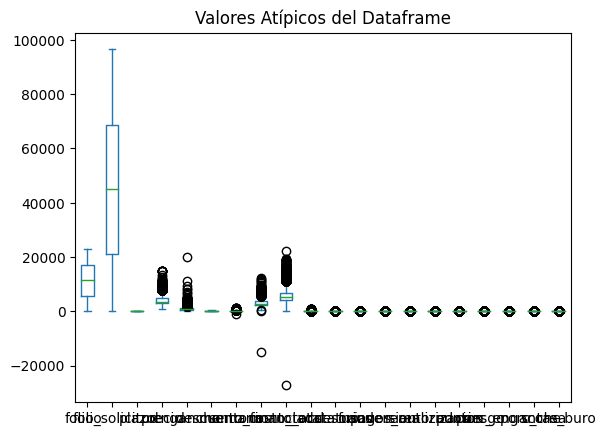

In [29]:
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama


In [30]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)


Limite superior permitido folio                31323.107698
folio_solicitud     127723.906961
plazo                   55.874879
precio                8081.558082
enganche              2356.496845
descuento              478.215020
semana                 541.287392
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
fraude                   0.864131
inversion                1.511599
pagos_realizados        39.306132
reautorizacion           0.578086
puntos                  42.386431
riesgo                  44.918214
porc_enganche           18.135840
porc_tasa               24.630537
score_buro              13.931194
dtype: float64
Limite inferior permitido folio               -8301.055796
folio_solicitud    -36023.715538
plazo                  -4.055569
precio                -87.484900
enganche             -503.622066
descuento            -321.263535
semana                -65.792692
monto_financiado     -

In [31]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df_sout= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_sout

folio  folio_solicitud  plazo  precio  enganche  descuento  semana  \
0          3               30     26  1949.0     780.0        0.0    81.0   
1          4               33     13  2999.0    1050.0        0.0   225.0   
2          5               37     13  1959.0     490.0        0.0   170.0   
3          6               38     13  1959.0     490.0        0.0   170.0   
4          7               44     39  4299.0    1075.0        0.0   178.0   
...      ...              ...    ...     ...       ...        ...     ...   
22730  22967            96502     26  3349.0     297.0        0.0   211.0   
22731  22968            96479     26  4100.0    1209.0        0.0   200.0   
22732  22969            96442     26  4849.0    1152.0        0.0   256.0   
22733  22970            96536     39     NaN       NaN        0.0   386.0   
22734  22971            96534     26  5399.0    1086.0        0.0   299.0   

       monto_financiado  costo_total  monto_accesorios  status  fraude  \
0                1169.0       2106.0               0.0     2.0     0.0   
1                1949.0       2925.0               0.0     2.0     0.0   
2                1469.0       2210.0               0.0     NaN     0.0   
3                1469.0       2210.0               0.0     2.0     0.0   
4                3224.0       6942.0               0.0     1.0     0.0   
...                 ...          ...               ...     ...     ...   
22730            3052.0       5486.0               0.0     1.0     0.0   
22731            2891.0       5200.0               0.0     1.0     0.0   
22732            3697.0       6656.0               0.0     1.0     0.0   
22733               NaN          NaN               0.0     1.0     0.0   
22734            4313.0       7774.0               0.0     1.0     0.0   

       inversion  pagos_realizados  reautorizacion  puntos  riesgo  \
0              0               0.0             0.0    14.1     3.5   
1              0               0.0             0.0    14.1     3.5   
2              0               0.0             0.0    14.1     0.0   
3              0               0.0             0.0    14.1     3.5   
4              0               0.0             0.0     0.0     0.0   
...          ...               ...             ...     ...     ...   
22730          0               0.0             0.0    14.1     3.5   
22731          0               0.0             0.0    14.1     3.5   
22732          0               0.0             0.0    14.1     3.5   
22733          0               0.0             0.0    14.1     3.5   
22734          1               0.0             0.0    14.1     3.5   

       porc_enganche  porc_tasa  score_buro  
0                0.9       0.00         0.0  
1                0.9       0.00         0.0  
2                0.0       0.00         0.0  
3                0.9       0.00         0.0  
4                0.0       0.00         0.0  
...              ...        ...         ...  
22730            NaN      -1.13         0.0  
22731            NaN       7.48         0.0  
22732            NaN       0.75         0.0  
22733            NaN      -0.14         0.0  
22734            NaN      -2.88         0.0  

[22735 rows x 20 columns]

In [32]:
#Corroboramos valores nulos
valores_nulos=df_sout.isnull().sum()
valores_nulos

folio                  0
folio_solicitud        0
plazo                  0
precio               110
enganche             292
descuento             17
semana               362
monto_financiado     182
costo_total          290
monto_accesorios     617
status               154
fraude              1701
inversion              0
pagos_realizados     184
reautorizacion       774
puntos               954
riesgo               138
porc_enganche        486
porc_tasa            899
score_buro           582
dtype: int64

In [33]:

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=df_sout.copy()
data_clean=data_clean.fillna(round(df_sout.mean(),1))
data_clean

folio  folio_solicitud  plazo  precio  enganche  descuento  semana  \
0          3               30     26  1949.0     780.0        0.0    81.0   
1          4               33     13  2999.0    1050.0        0.0   225.0   
2          5               37     13  1959.0     490.0        0.0   170.0   
3          6               38     13  1959.0     490.0        0.0   170.0   
4          7               44     39  4299.0    1075.0        0.0   178.0   
...      ...              ...    ...     ...       ...        ...     ...   
22730  22967            96502     26  3349.0     297.0        0.0   211.0   
22731  22968            96479     26  4100.0    1209.0        0.0   200.0   
22732  22969            96442     26  4849.0    1152.0        0.0   256.0   
22733  22970            96536     39  3969.2     897.6        0.0   386.0   
22734  22971            96534     26  5399.0    1086.0        0.0   299.0   

       monto_financiado  costo_total  monto_accesorios  status  fraude  \
0                1169.0       2106.0               0.0     2.0     0.0   
1                1949.0       2925.0               0.0     2.0     0.0   
2                1469.0       2210.0               0.0     1.2     0.0   
3                1469.0       2210.0               0.0     2.0     0.0   
4                3224.0       6942.0               0.0     1.0     0.0   
...                 ...          ...               ...     ...     ...   
22730            3052.0       5486.0               0.0     1.0     0.0   
22731            2891.0       5200.0               0.0     1.0     0.0   
22732            3697.0       6656.0               0.0     1.0     0.0   
22733            3043.8       5588.6               0.0     1.0     0.0   
22734            4313.0       7774.0               0.0     1.0     0.0   

       inversion  pagos_realizados  reautorizacion  puntos  riesgo  \
0              0               0.0             0.0    14.1     3.5   
1              0               0.0             0.0    14.1     3.5   
2              0               0.0             0.0    14.1     0.0   
3              0               0.0             0.0    14.1     3.5   
4              0               0.0             0.0     0.0     0.0   
...          ...               ...             ...     ...     ...   
22730          0               0.0             0.0    14.1     3.5   
22731          0               0.0             0.0    14.1     3.5   
22732          0               0.0             0.0    14.1     3.5   
22733          0               0.0             0.0    14.1     3.5   
22734          1               0.0             0.0    14.1     3.5   

       porc_enganche  porc_tasa  score_buro  
0                0.9       0.00         0.0  
1                0.9       0.00         0.0  
2                0.0       0.00         0.0  
3                0.9       0.00         0.0  
4                0.0       0.00         0.0  
...              ...        ...         ...  
22730            0.2      -1.13         0.0  
22731            0.2       7.48         0.0  
22732            0.2       0.75         0.0  
22733            0.2      -0.14         0.0  
22734            0.2      -2.88         0.0  

[22735 rows x 20 columns]

In [34]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

folio               0
folio_solicitud     0
plazo               0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
porc_enganche       0
porc_tasa           0
score_buro          0
dtype: int64

# Modelos de Regresion

Modelo 1, Dependiente= Enganche, Independiente=precio

In [35]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= data_clean[['precio']]
Var_Dep= data_clean['enganche']

In [36]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [37]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [38]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19755406]),
 'rank_': 1,
 'singular_': array([195288.39118269]),
 'intercept_': 113.43901482426213}

** Modelo matematico 1 = 0.19755406x + 113.43901482426213 **

In [39]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.4768485990731465

In [40]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6905422500275754

Modelo 2 VD: Precio vs VI: Monto Financiamiento




In [41]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep1= data_clean[['monto_financiado']]
Var_Dep1= data_clean['precio']

In [42]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [44]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.18708625]),
 'rank_': 1,
 'singular_': array([153923.91032893]),
 'intercept_': 355.96411451753374}

Modelo 2: 1.18708625x + 355.96411451753374

In [45]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter1

0.8754349280145478

In [46]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.9356467966142714

Modelo 3 VD: Costo total vs VI: monto_accesorios

In [47]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep2= data_clean[['monto_financiado']]
Var_Dep2= data_clean['costo_total']

In [48]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [49]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [50]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.85672597]),
 'rank_': 1,
 'singular_': array([153923.91032893]),
 'intercept_': -62.862920333865986}

** Modelo 3: 1.85672597x - 62.862920333865986 **

In [51]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.775357011654102

In [52]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.8805435887303377

Modelo 4 VD: “Pagos_realizados” vs VI: puntos

In [53]:
Vars_Indep3= data_clean[['puntos']]
Var_Dep3= data_clean['pagos_realizados']

In [54]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [55]:
model3.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [56]:
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['puntos'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.21975793]),
 'rank_': 1,
 'singular_': array([984.07932307]),
 'intercept_': 7.133172116563292}

Modelo 4: 0.21975793x + 7.133172116563292

In [58]:
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.02402869602950286

In [59]:
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.15501192221730192

Modelo 5 VD: Riesgo vs VI: porc_enganche

In [66]:
Vars_Indep4= data_clean[['porc_enganche']]
Var_Dep4= data_clean['riesgo']

In [67]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [68]:
model4.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [69]:
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['porc_enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.4159175]),
 'rank_': 1,
 'singular_': array([485.27498367]),
 'intercept_': 3.257526028287584}

Modelo matematico 5 = 1.4159175 x + 3.257526028287584

In [70]:
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.11954236537073704

In [71]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.34574899185787517

Modelo 6 VD: “Plazo” vs VI: porc_enganche

In [ ]:
Vars_Indep5= data_clean[['porc_enganche']]
Var_Dep5= data_clean['plazo']

In [ ]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [ ]:
model5.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [ ]:
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['porc_enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.42736665]),
 'rank_': 1,
 'singular_': array([485.27498367]),
 'intercept_': 26.011462443668087}

Modelo 6: -0.42736665x + 26.011462443668087

In [ ]:
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.018963070773394097

In [ ]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.13770646598251696

Modelo 7 *VD:“Monto_financiado” vs VI: score_buro **

In [ ]:
Vars_Indep6= data_clean[['score_buro']]
Var_Dep6= data_clean['monto_financiado']

In [ ]:
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()

In [ ]:
model6.fit(X=Vars_Indep6, y=Var_Dep6)

LinearRegression()

In [ ]:
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['score_buro'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-31.85435185]),
 'rank_': 1,
 'singular_': array([205.6158586]),
 'intercept_': 3040.8285997797416}

Modelo 7: -31.85435185x + 3040.8285997797416



In [ ]:
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.0018106669944421006

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.0425519329107633

Modelo 8: VD: 	“Porcentaje_enganche” vs VI: inversion

In [ ]:
Vars_Indep7= data_clean[['inversion']]
Var_Dep7= data_clean['porc_enganche']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [ ]:
model7.fit(X=Vars_Indep7, y=Var_Dep7)

LinearRegression()

In [ ]:
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['inversion'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.87997213]),
 'rank_': 1,
 'singular_': array([64.08082784]),
 'intercept_': 0.44641852961511835}

Modelo 8: -0.87997213x +  0.44641852961511835

In [ ]:
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

0.013502626420568542

In [ ]:
coef_Corre7=np.sqrt(coef_Deter7)
coef_Corre7

0.11620080215114069